In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import warnings

In [4]:
df = pd.read_csv("car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Statystyki opisowe

In [18]:
numerical_columns = ['year', 'condition', 'odometer','sellingprice']
categorical_columns = ['make', 'model', 'body','color']

In [19]:
print("Descriptive Statistics:")
print(df[numerical_columns].describe())
print("\nCategorical Statistics:")
print(df[categorical_columns].describe())

Descriptive Statistics:
                year      condition       odometer   sellingprice
count  558837.000000  547017.000000  558743.000000  558825.000000
mean     2010.038927      30.672365   68320.017767   13611.358810
std         3.966864      13.402832   53398.542821    9749.501628
min      1982.000000       1.000000       1.000000       1.000000
25%      2007.000000      23.000000   28371.000000    6900.000000
50%      2012.000000      35.000000   52254.000000   12100.000000
75%      2013.000000      42.000000   99109.000000   18200.000000
max      2015.000000      49.000000  999999.000000  230000.000000

Categorical Statistics:
          make   model    body   color
count   548536  548438  545642  558088
unique      96     973      87      46
top       Ford  Altima   Sedan   black
freq     93554   19349  199437  110970


In [54]:
#Distribution of year production all cars
YEAR = df['year'].value_counts()
fig = px.bar(YEAR, 
             title="Rozkład lat produkcji wszystkich samochodów",
             labels={'index': 'Rok produkcji', 'value': 'Liczba samochodów'})

fig.update_layout(
    xaxis_title="Rok produkcji",
    yaxis_title="Liczba samochodów",
    title={
        'text': "Rozkład roku produkcji wszystkich samochodów",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    showlegend=False
)
fig.show()

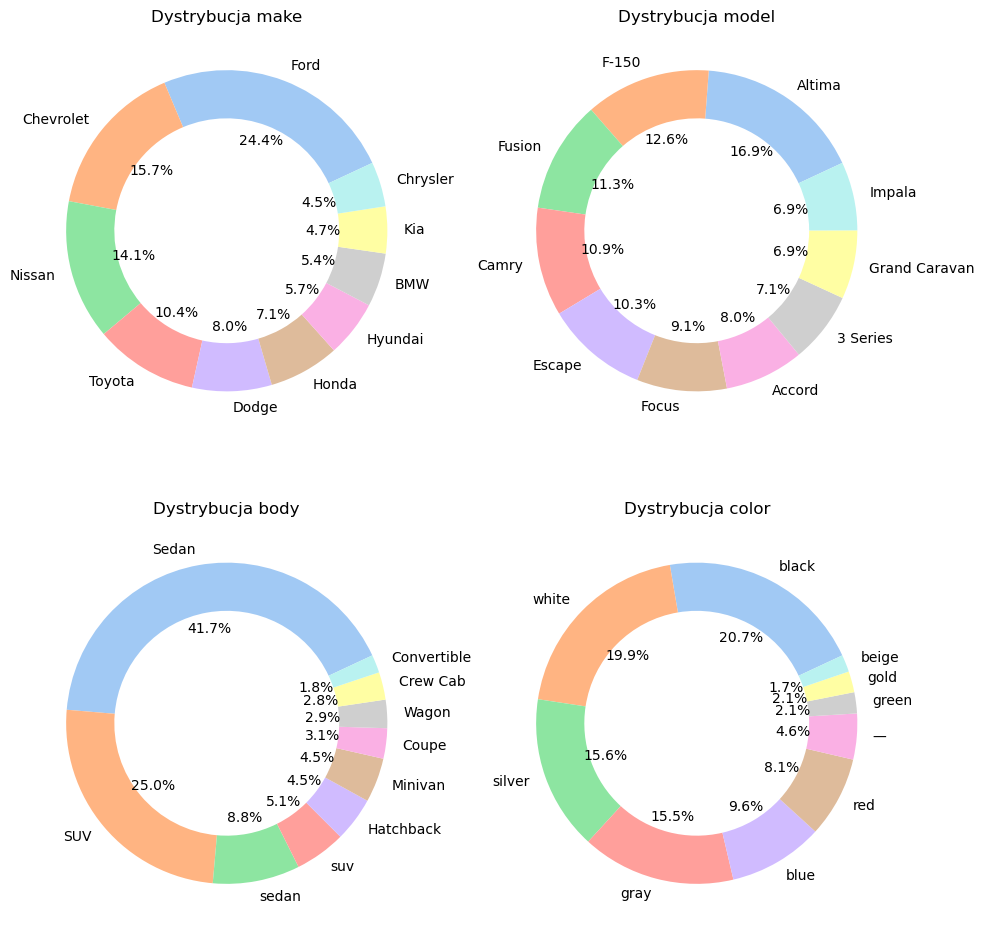

In [52]:
#Distribution of make,model,body, color
def plot_pie_chart_subplot(ax, column):
    ax.pie(df[column].value_counts().head(10), 
           labels=df[column].value_counts().head(10).index, 
           autopct='%1.1f%%', 
           startangle=25, 
           colors=sns.color_palette('pastel'), 
           wedgeprops=dict(width=0.3))
    ax.set_title(f'Dystrybucja {column}')
columns = ['make', 'model', 'body', 'color']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for ax, col in zip(axes.flatten(), columns):
    plot_pie_chart_subplot(ax, col)
plt.tight_layout()
plt.show()



c:\Users\davyd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



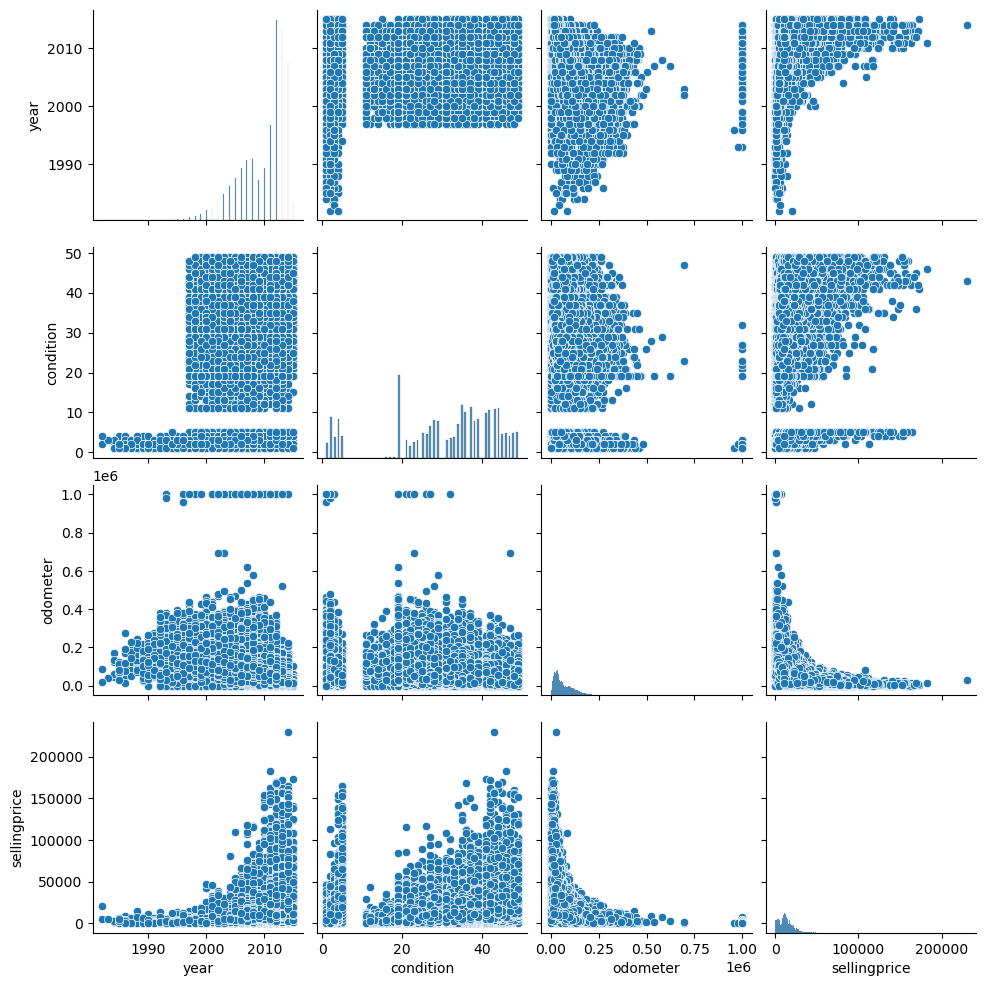

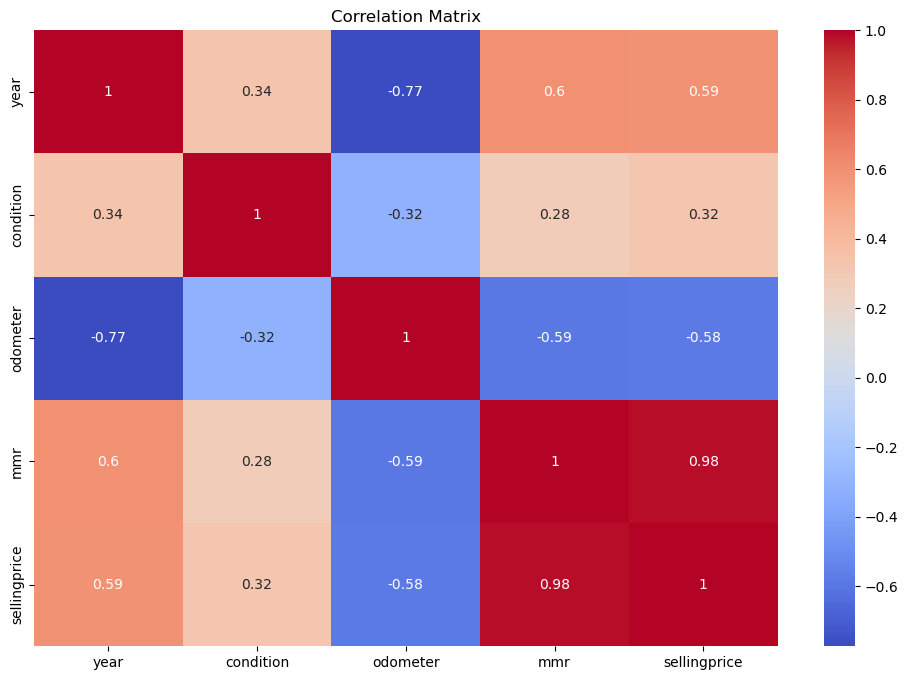

In [60]:
sns.pairplot(df[numerical_columns])
plt.show()

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [59]:

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='sale_month', data=df, ax=axs[0], palette='viridis')
axs[0].set_title('Number of Sales by Month', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Month', fontsize=14)
axs[0].set_ylabel('Number of Sales', fontsize=14)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
sns.countplot(x='sale_dayofweek', data=df, ax=axs[1], palette='plasma')
axs[1].set_title('Number of Sales by Day of Week', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Day of Week', fontsize=14)
axs[1].set_ylabel('Number of Sales', fontsize=14)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

C:\Users\davyd\AppData\Local\Temp\ipykernel_13988\1771651045.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



DateParseError: year 16500 is out of range: 16500, at position 2896